## First pass over SILAC DIA data 

### Notes:

This notebook will serve as first touch of the data and let me establish some data access commands via pymzml.

In [1]:
import numpy as np
import pymzml as pml

import matplotlib.pyplot as plt

### A plot of the first MS1

In [2]:
def plot_spectrum(s):    
    plt.figure(figsize=(15, 10))
    plt.stem(s.centroidedPeaks[:, 0], s.centroidedPeaks[:, 1], markerfmt=" ")
    plt.show()

In [3]:
msrun = pml.run.Reader("../Data/DIA_FULL/UWPROFL0362.mzML")
first_ms1 = msrun[1]
first_ms1['ms level']

1.0

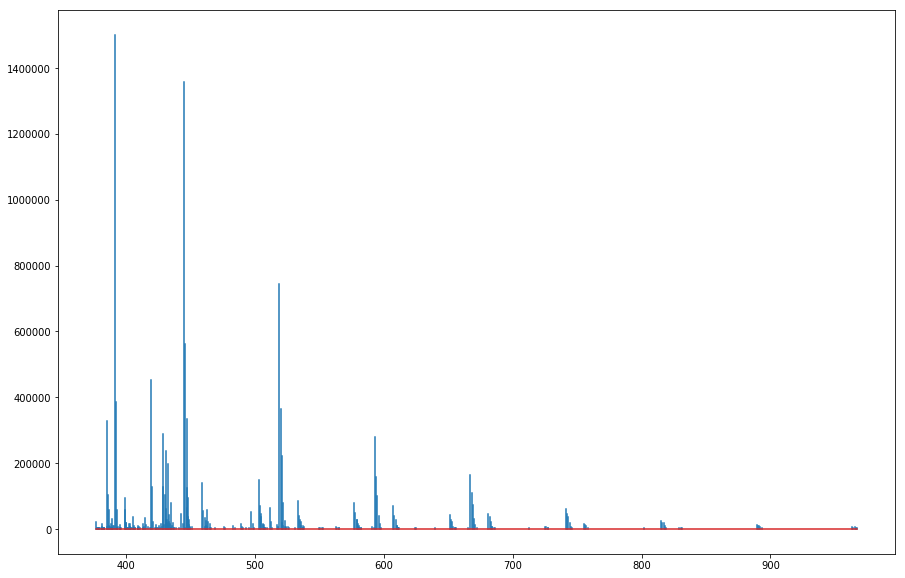

In [4]:
plot_spectrum(first_ms1)

### Plotting the tic

The above tells me that I can denoise the data somewhere around the median and add up the intensities to find 10 minutes that suits my purposes.

In [5]:
def generate_tic(file):
    total_intensity = []
    indices = []
    msrun = pml.run.Reader(file)
    ind = 1
    for spec in msrun:
        if spec['ms level'] == 1.0:
            spec = spec.remove_noise(mode='median')
            total_intensity.append(spec.i.sum())
            indices.append(ind)
        ind += 1
    return indices, total_intensity

def plot_tic(indices, intensity, title):
    plt.figure(figsize=(15, 10))
    
    plt.plot(indices, intensity)
    plt.title(title, size=24)
    plt.xlabel("Scan Index", size=20)
    plt.ylabel("Total Ion Current", size=20)
    plt.tick_params(labelsize=16)
    plt.show()

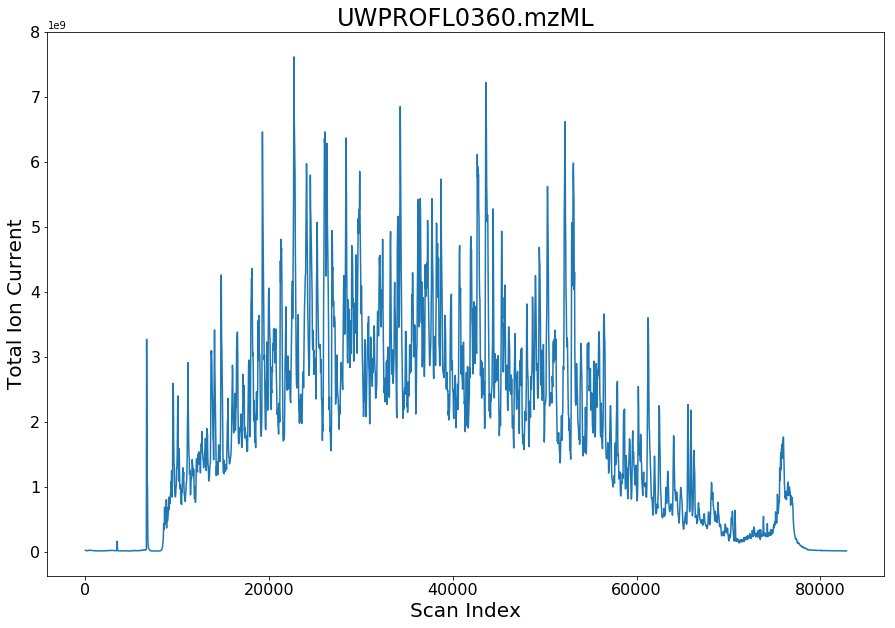

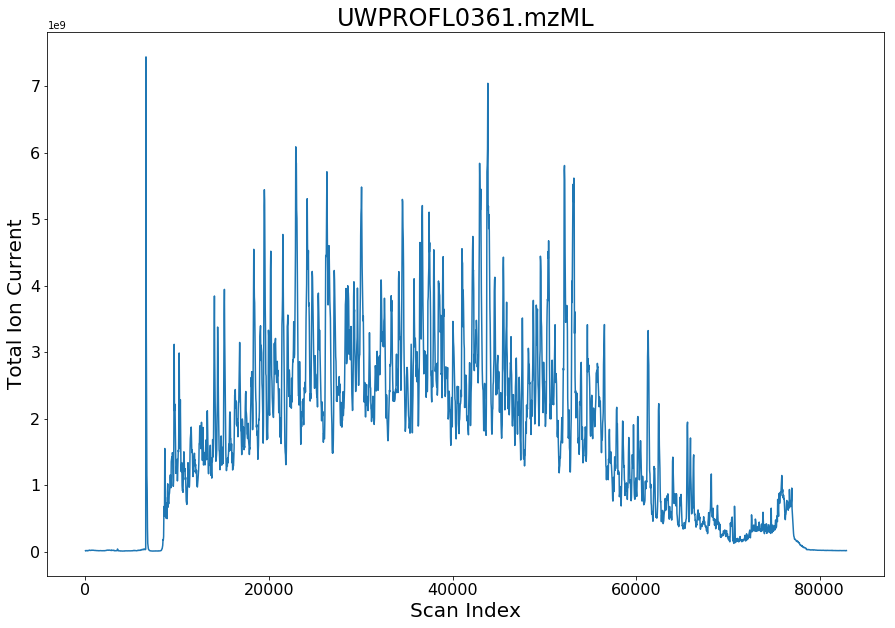

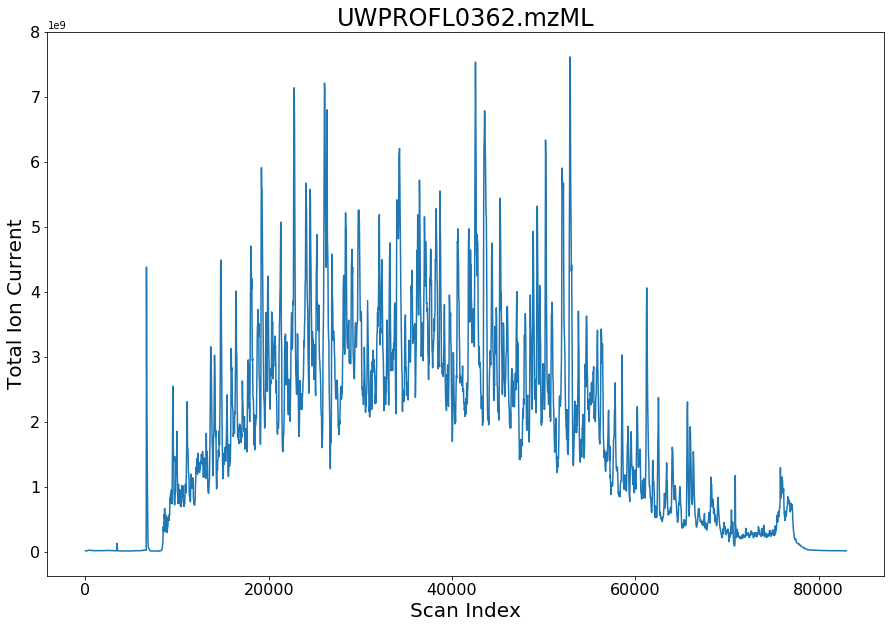

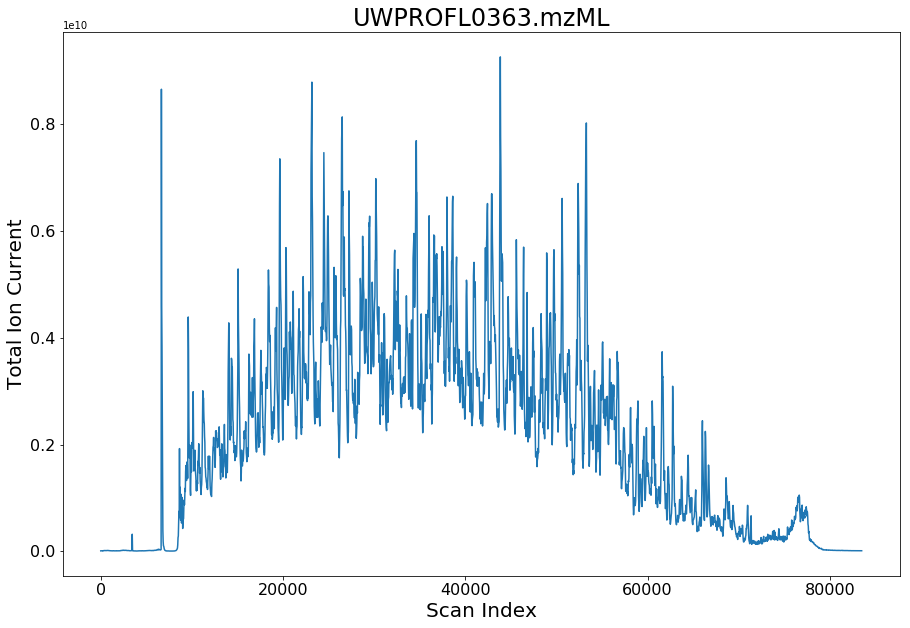

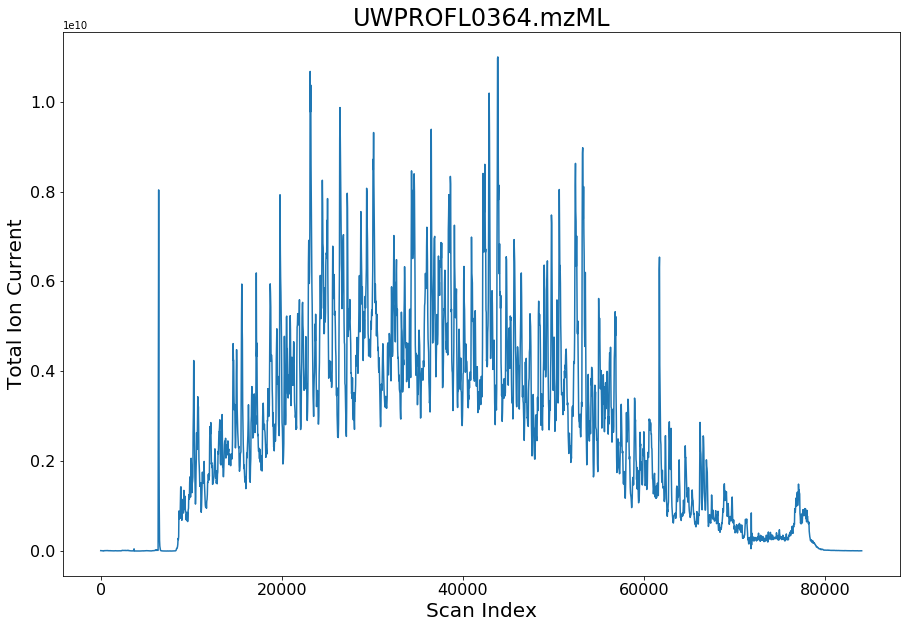

In [6]:
for i in range(5):
    indices, total_intensity = generate_tic("../Data/DIA_FULL/UWPROFL036{}.mzML".format(i))
    plot_tic(indices, total_intensity, "UWPROFL036{}.mzML".format(i))

### Conclusions

These TICs indicate that I will get the most out of analyzing any time period between 20000 and 60000. For the initial analyses, I will utilize 30000 through 40000 to give a good test block of time to estimate algorithm robustness.

In [36]:
def find_next_ms1(file, start):
    ind = start
    msrun = pml.run.Reader(file)
    while msrun[ind]['ms level'] != 1.0:
        ind += 1
    return ind

In [38]:
for i in range(5):
    file_name = "../Data/DIA_FULL/UWPROFL036{}.mzML".format(i)
    print("Range for " + file_name)
    print("Low: ", find_next_ms1(file_name, 30000))
    print("High: ", find_next_ms1(file_name, 40000))

Range for ../Data/DIA_FULL/UWPROFL0360.mzML
Low:  30017
High:  40001
Range for ../Data/DIA_FULL/UWPROFL0361.mzML
Low:  30017
High:  40001
Range for ../Data/DIA_FULL/UWPROFL0362.mzML
Low:  30017
High:  40001
Range for ../Data/DIA_FULL/UWPROFL0363.mzML
Low:  30017
High:  40001
Range for ../Data/DIA_FULL/UWPROFL0364.mzML
Low:  30017
High:  40001
